In [59]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
from random import randint
def naive(pattern, text):
    P, T = len(pattern), len(text)
    occurence = []
    
    for i in range(T - P + 1):
        j = 0 
        while j < P:
            if pattern[j] != text[j + i]: break
            j += 1
            
        if j == P: occurence.append(i)
    
    return occurence

--2021-11-29 19:39:54--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.86.247.194, 99.86.247.38, 99.86.247.6, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.86.247.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48,12K  --.-KB/s    in 0,03s   

2021-11-29 19:39:54 (1,71 MB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [4]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [5]:
def generate_random_reads():
    reads = []
    
    for _ in range(100):
        index = randint(0, G-10)
        reads.append(genome[index:index + 10])
    return reads

In [6]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [7]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [60]:
genome = readGenome('lambda_virus.fa')
G = len(genome)

In [61]:
random_reads = generate_random_reads()

In [62]:
def count_matches(reads, gen):
    matched = 0

    for read in reads:
        if len(naive(read, gen)) > 0:
            matched += 1

    print( '%d / %d matches' % (matched, len(reads)) )
    

In [63]:
count_matches(random_reads, genome)

100 / 100 matches


In [64]:
# reads,_ = readFastq('ERR266411_1.first1000.fastq')

In [65]:
# count_matches(reads, genome)

In [66]:
# def count_reduced_matches(reads, gen):
#     matched = 0

#     for read in reads:
#         if len(naive(read[:30], gen)) > 0 or len(naive(reverseComplement(read[:30]), gen)) > 0:
#             matched += 1
        

#     print( '%d / %d matches' % (matched, len(reads)) )

In [67]:
# count_reduced_matches(reads, genome)

In [127]:
#1.
pattern = 'AGGT'
count = len(naive(pattern, genome)) + len(naive(reverseComplement(pattern), genome))


print( '%d  count' % (count) )

306  count


In [74]:
# 2.
pat2 = 'TTAA'
count = len(naive(pat2, genome))


print( '%d  count' % (count) )

195  count


In [80]:
# 3.
pat3 = 'ACTAAGT'
i1 = genome.index(pat3)
i2 = genome.index(reverseComplement(pat3))
print(i1,i2)

27733 26028


In [128]:
# 4.
pat4 = 'AGTCGA'
i_4 = genome.index(pat4)
i_42 = genome.index(reverseComplement(pat4))
print(i_4,i_42)

18005 450


In [102]:
def naive_2mm(pattern, text):
    P, T = len(pattern), len(text)
    occurence = []
    for i in range(T - P + 1):
        j = 0 
        mm = 0        
        while j < P:
            if pattern[j] != text[j + i]: 
                mm += 1
                if mm > 2: break
            j += 1
            
        if j == P: occurence.append(i)
    
    return occurence

In [103]:
t = 'ACTTACTTGATAAAGT'
p = 'ACTTTA'
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [106]:
len(naive_2mm('TTCAAGCC', genome))

191

In [111]:
naive_2mm('AGGAGGTT', genome)[0]

49

In [112]:
!wget  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2021-11-29 20:07:25--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.86.247.194, 99.86.247.38, 99.86.247.6, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.86.247.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235,96K   819KB/s    in 0,3s    

2021-11-29 20:07:26 (819 KB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [116]:
reads,_ = readFastq('ERR037900_1.first1000.fastq')

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt

In [121]:
gc = [0] * 100
total = [0] * 100
for read in reads:
    for i in range(100):
        if read[i] in 'GC':
            gc[i] += 1
        total[i] += 1
p = [0] * 100
for i in range(100):
    if total[i] > 0:
        p[i] = gc[i]/float(total[i])        

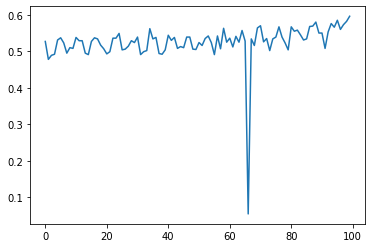

In [122]:
plt.plot(range(100), p)
plt.show()

In [123]:
min_val = min(p)

In [124]:
min_val

0.055

In [125]:
p.index(min_val)

66

In [126]:
p[66]

0.055